# Task Breakdown

- Data Collection: Data is collected and provided to you.
- Data Pre-processing: Convert the musical scores into a format suitable for deep learning models. This involves converting the musical scores into MIDI files and applying data augmentation techniques.
- Feature Extraction: Extractfeatures from the MIDI files, such as notes, chords, and tempo, using music analysis tools.
- Model Building: Develop a deep learning model using LSTM and CNN architectures to classify the musical scores according to the composer.
- Model Training: Train the deep learning model using the pre-processed and feature-extracted data.
- Model Evaluation: Evaluate the performance of the deep learning model using accuracy, precision, and recall metrics.
- Model Optimization: Optimize the deep learning model by fine-tuning hyperparameters.

In [1]:
!pip install pretty_midi

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#@title 1: Functions for Data Collection
# Function for Feature extractions
import os
import glob
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Check if pickle file exists and use the file for dataset
import pickle


# Directory of MIDI files
base_dir = 'train'

# Specify the path and filename of the pickle file
# Since the pkl file exists, that means the data was processed and features extracted
pickle_file_name = 'team8_composer_dataset.pkl'

# TBD:Extract features using librosa for further feature extraction
def calculate_features(midi_file):
    # Load MIDI file
    midi_data = pretty_midi.PrettyMIDI(midi_file)

    # Time interval for calculating features
    interval = 1.0  # 1 second
    times = np.arange(0, midi_data.get_end_time(), interval)

    # Create arrays for storing time series data
    pitch = np.zeros(len(times))
    volume = np.zeros(len(times))
    note_density = np.zeros(len(times))
    tempo = np.zeros(len(times))

    # Calculate time series data for each feature
    for i, t in enumerate(times):
        # Get notes that are playing at this time
        notes = [note for note in midi_data.instruments[0].notes if note.start <= t < note.end]

        # Calculate average pitch
        if notes:
            pitch[i] = np.mean([note.pitch for note in notes])

        # Calculate note density (notes per second)
        note_density[i] = len(notes) / interval

        # Calculate average volume
        if notes:
            volume[i] = np.mean([note.velocity for note in notes])

    # Calculate rhythmic complexity (variance in inter-onset intervals)
    inter_onset_intervals = np.diff([note.start for note in midi_data.instruments[0].notes])
    rhythmic_complexity = np.var(inter_onset_intervals)

    # Calculate tempo for each moment in time
    tempo_changes = midi_data.get_tempo_changes()
    tempo = np.interp(times, tempo_changes[0], tempo_changes[1])

    return times, pitch, note_density, volume, rhythmic_complexity, tempo

def process_composer_data():
    # Initialize DataFrame
    df = pd.DataFrame(columns=["Composer","Times", "Pitch", "Note_Density", "Volume", 
                               "Rhythmic_Complexity", "Tempo"])

    # Iterate over all composer directories
    for composer_dir in glob.glob(os.path.join(base_dir, '*')):
        # Get the composer's name
        composer_name = os.path.basename(composer_dir)
        print(f"Processing {composer_name} MIDI files...")

        # Iterate over all MIDI files in composer's directory
        for midi_file in glob.glob(os.path.join(composer_dir, '*.mid')):
            print(f"Processing {midi_file}...")
            try:
                times, pitch, note_density, volume, rhythmic_complexity, tempo = calculate_features(midi_file)
                # Append to DataFrame
                df = df.append({"Composer": composer_name, "Times": times, "Pitch": pitch, 
                                "Note_Density": note_density, "Volume": volume, 
                                "Rhythmic_Complexity": rhythmic_complexity, 
                                "Tempo": tempo}, 
                               ignore_index=True)
            except Exception as e:
                print(f"Error processing {midi_file}: {str(e)}")
    
    # Write the DataFrame to a pickle file
    df.to_pickle(base_dir + "/" + pickle_file_name)
    
    return df

In [3]:
# Data Processing
# Feature extraction

pickle_file = base_dir + "/" + pickle_file_name
# Check if the pickle file exists
if not os.path.exists(pickle_file):
    print("Music Data not Pickled, creating dataset using feature extract.")
    df = process_composer_data()
else:
    # Open the pickle file in binary mode and load the data
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)

    # Create a DataFrame from the loaded data
    df = pd.DataFrame(data)

    # Now you have your DataFrame ready for use
    print(df.head())

  Composer                                              Times  \
0     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
1     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
2     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
3     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
4     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                               Pitch  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 73.0,...   
1  [0.0, 78.0, 78.0, 0.0, 66.0, 66.0, 0.0, 0.0, 6...   
2  [0.0, 67.0, 43.0, 0.0, 67.0, 0.0, 43.0, 55.0, ...   
3  [0.0, 0.0, 50.0, 74.0, 0.0, 74.0, 0.0, 74.0, 0...   
4  [0.0, 63.0, 69.0, 0.0, 0.0, 69.0, 0.0, 45.0, 0...   

                                        Note_Density  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
1  [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...   
2  [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...   
3  [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,

In [4]:
# Data Pre-processing
print(df.head())
print(df.info())

  Composer                                              Times  \
0     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
1     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
2     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
3     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
4     bach  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                               Pitch  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 73.0,...   
1  [0.0, 78.0, 78.0, 0.0, 66.0, 66.0, 0.0, 0.0, 6...   
2  [0.0, 67.0, 43.0, 0.0, 67.0, 0.0, 43.0, 55.0, ...   
3  [0.0, 0.0, 50.0, 74.0, 0.0, 74.0, 0.0, 74.0, 0...   
4  [0.0, 63.0, 69.0, 0.0, 0.0, 69.0, 0.0, 45.0, 0...   

                                        Note_Density  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
1  [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...   
2  [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...   
3  [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,

In [14]:
# Preparing the data for LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

# Convert all other features to have an extra dimension for LSTM
def transform_series(series, num_steps):
    # Reshape series to (samples, time_steps, features)
    X = np.zeros((len(series), num_steps, 1))
    for i in range(len(series)):
        X[i,:,0] = series.iloc[i][:num_steps]
    return X


# Separate out the test set
# Using stratify to ensure the datasets have same prorportions of each composer as original dataset
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Composer'])

# Second, we separate the remaining data into the train and validation sets
df_train, df_val = train_test_split(df_train_val, test_size=0.25, random_state=42, stratify=df_train_val['Composer'])

# The train/val/test split is now 60%/20%/20%

# Encode the labels
encoder = LabelEncoder()
encoder.fit(df['Composer'])  # Fit on the whole dataset

# Transform the labels to one-hot encoded form for each subset
y_train = np_utils.to_categorical(encoder.transform(df_train['Composer']))
y_val = np_utils.to_categorical(encoder.transform(df_val['Composer']))
y_test = np_utils.to_categorical(encoder.transform(df_test['Composer']))

# Apply transform_series on each feature for each subset
def prepare_data(df, num_steps):
    pitch = transform_series(df['Pitch'], num_steps)
    note_density = transform_series(df['Note_Density'], num_steps)
    volume = transform_series(df['Volume'], num_steps)
    rhythmic_complexity = np.array([df['Rhythmic_Complexity'].values]*num_steps).T[:,:,np.newaxis]
    tempo = transform_series(df['Tempo'], num_steps)

    X = np.concatenate([pitch, note_density, volume, rhythmic_complexity, tempo], axis=-1)
    return X

num_steps = 27
X_train = prepare_data(df_train, num_steps)
X_val = prepare_data(df_val, num_steps)
X_test = prepare_data(df_test, num_steps)

In [19]:
print(y_train.shape[1])
print(y_train)
print(X_val.shape)

9
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(74, 27, 5)


In [16]:
# Model Building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

num_classes = y_train.shape[1]  # assuming y_train is one-hot encoded
num_features = 5

model = Sequential([
    LSTM(50, activation='relu', input_shape=(num_steps, num_features)),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11200     
                                                                 
 dense_1 (Dense)             (None, 9)                 459       
                                                                 
Total params: 11,659
Trainable params: 11,659
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Model Training

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # adjust as needed

Epoch 1/10
7/7 [==============================] - 1s 41ms/step - loss: 93.2616 - accuracy: 0.1357 - val_loss: 79.8553 - val_accuracy: 0.1216
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 84.1676 - accuracy: 0.1448 - val_loss: 68.6948 - val_accuracy: 0.1622
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 79.8882 - accuracy: 0.0905 - val_loss: 77.2806 - val_accuracy: 0.1216
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 89.7097 - accuracy: 0.1176 - val_loss: 80.4404 - val_accuracy: 0.1216
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 90.1596 - accuracy: 0.0905 - val_loss: 97.3767 - val_accuracy: 0.1216
Epoch 6/10
7/7 [==============================] - 0s 9ms/step - loss: 91.3193 - accuracy: 0.1222 - val_loss: 103.8171 - val_accuracy: 0.1622
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 74.3902 - accuracy: 0.1312 - val_loss: 75.1611 - val_accuracy: 0.1486
Epoch 8/10
7/7

In [18]:
# Model Evaluation
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_accuracy))

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# If you're doing classification and you used a softmax or sigmoid activation function in your output layer, 
# the outputs will be probabilities and you'll need to convert them to class labels
y_test_pred_class = np.argmax(y_test_pred, axis=1)

3/3 [==============================] - 0s 4ms/step - loss: 59.6226 - accuracy: 0.1216
Test Loss: 59.62261199951172
Test Accuracy: 0.12162162363529205
3/3 [==============================] - 0s 5ms/step


In [2]:
import librosa

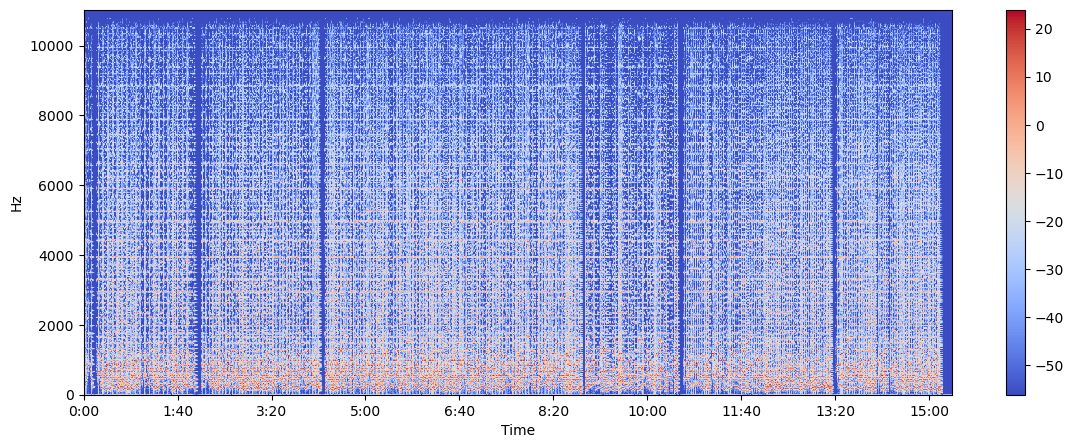

In [3]:
%matplotlib inline
audio_data = "train/bach/bach342.wav"
librosa.load(audio_data)
import matplotlib.pyplot as plt
x , sr = librosa.load(audio_data)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.savefig('train/bach/bach342.png')

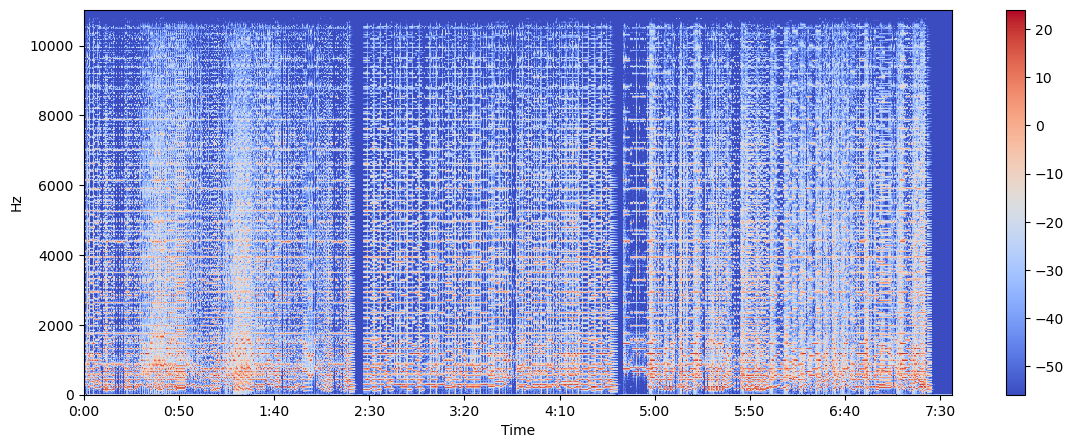

In [16]:
audio_data = "train/bach/bach343.wav"
librosa.load(audio_data)
%matplotlib inline
import matplotlib.pyplot as plt
x , sr = librosa.load(audio_data)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.savefig('train/bach/bach343.png')

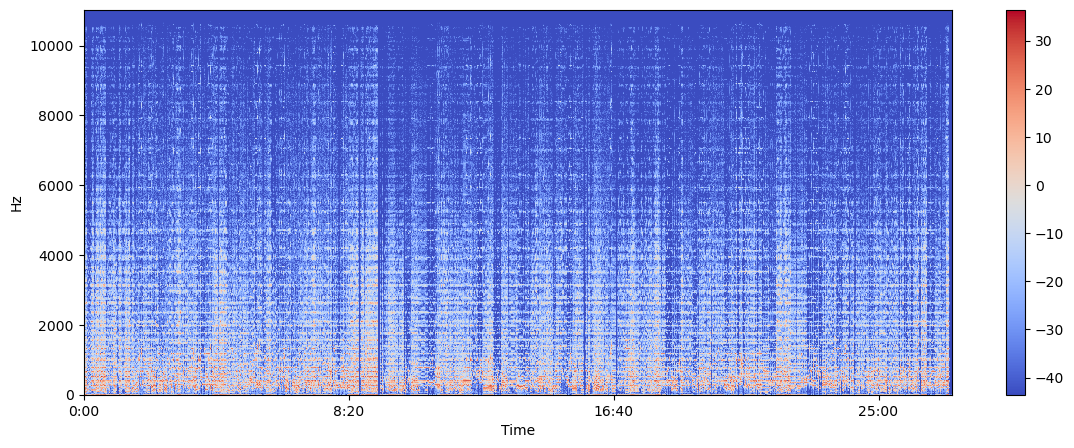

In [20]:
audio_data = "train/mozart/mozart000.wav"
librosa.load(audio_data)
%matplotlib inline
import matplotlib.pyplot as plt
x , sr = librosa.load(audio_data)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.savefig('train/mozart/mozart000.png')

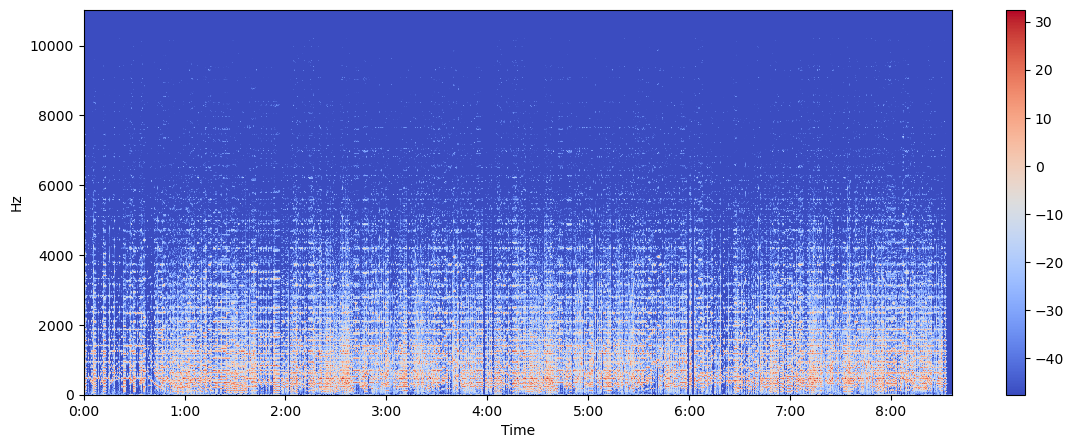

In [21]:
audio_data = "train/mozart/mozart001.wav"
librosa.load(audio_data)
%matplotlib inline
import matplotlib.pyplot as plt
x , sr = librosa.load(audio_data)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.savefig('train/mozart/mozart001.png')

In [8]:
from PIL import Image
import numpy as np
import os
from skimage import transform
import librosa
import matplotlib.pyplot as plt
from scipy import ndimage
import matplotlib.pyplot as plt

import re

def change_extension(filename, new_extension):
    return re.sub(r'\.\w+$', new_extension, filename)

def generate_images(dataset_path):
    X = []
    y = []
    composers = os.listdir(dataset_path)
    for i, composer in enumerate(composers):
        composer_path = os.path.join(dataset_path, composer)
         # Check if it is a directory
        if os.path.isdir(composer_path):
            for filename in os.listdir(composer_path):
                if filename.endswith('.wav'):
                    print(dataset_path + "/" + composer + "/" + filename)
                    %matplotlib inline
                    x , sr = librosa.load(dataset_path + "/" + composer + "/" + filename)
                    X = librosa.stft(x)
                    img_filename = change_extension(filename, ".png")
                    
                    # Generate spectrogram
                    D = np.abs(X)
                    # Resize to 224x224
                    D_resized = ndimage.zoom(D, (224.0/D.shape[0], 224.0/D.shape[1]))

                    # Generate the image
                    plt.figure(figsize=(5, 5))
                    librosa.display.specshow(librosa.amplitude_to_db(D_resized, ref=np.max), sr=sr, x_axis='time', y_axis='log')
                    plt.tight_layout()
                    plt.savefig(dataset_path + "/" + composer + "/" + img_filename)
                    print(img_filename)
                    plt.close()
                    

def load_image(filename):
    img = Image.open(filename)
    img = img.convert('RGB')  # Convert image to RGB if it's not
    return np.array(img)

def load_dataset(dataset_path):
    X = []
    y = []
    composers = os.listdir(dataset_path)
    for i, composer in enumerate(composers):
        composer_path = os.path.join(dataset_path, composer)
        # Check if it is a directory
        if os.path.isdir(composer_path):
            for filename in os.listdir(composer_path):
                if filename.endswith('.png'):
                    # Load the image and append it to the dataset
                    X.append(load_image(os.path.join(composer_path, filename)))
                    # Append the composer's index to the labels
                    y.append(i)
    return np.array(X), np.array(y)


In [7]:
#generate_images('train')

train/bach/bach342.wav
bach342.png
train/bach/bach343.wav
bach343.png
train/bach/bach345.wav
bach345.png
train/bach/bach346.wav
bach346.png
train/bach/bach347.wav
bach347.png
train/bach/bach350.wav
bach350.png
train/bach/bach351.wav
bach351.png
train/bach/bach352.wav
bach352.png
train/bach/bach353.wav
bach353.png
train/bach/bach355.wav
bach355.png
train/bach/bach357.wav
bach357.png
train/bach/bach358.wav
bach358.png
train/bach/bach360.wav
bach360.png
train/bach/bach361.wav
bach361.png
train/bach/bach362.wav
bach362.png
train/bach/bach363.wav
bach363.png
train/bach/bach364.wav
bach364.png
train/bach/bach365.wav
bach365.png
train/bach/bach366.wav
bach366.png
train/bach/bach367.wav
bach367.png
train/bach/bach368.wav
bach368.png
train/bach/bach369.wav
bach369.png
train/bach/bach370.wav
bach370.png
train/bach/bach371.wav
bach371.png
train/bach/bach372.wav
bach372.png
train/bach/bach373.wav
bach373.png
train/bach/bach374.wav
bach374.png
train/bach/bach375.wav
bach375.png
train/bach/bach377.w

hummel297.png
train/hummel/hummel298.wav
hummel298.png
train/hummel/hummel299.wav
hummel299.png
train/hummel/hummel300.wav
hummel300.png
train/hummel/hummel302.wav
hummel302.png
train/hummel/hummel305.wav
hummel305.png
train/hummel/hummel306.wav
hummel306.png
train/hummel/hummel307.wav
hummel307.png
train/hummel/hummel308.wav
hummel308.png
train/hummel/hummel309.wav
hummel309.png
train/hummel/hummel310.wav
hummel310.png
train/hummel/hummel311.wav
hummel311.png
train/hummel/hummel313.wav
hummel313.png
train/hummel/hummel315.wav
hummel315.png
train/hummel/hummel316.wav
hummel316.png
train/hummel/hummel317.wav
hummel317.png
train/hummel/hummel318.wav
hummel318.png
train/hummel/hummel319.wav
hummel319.png
train/hummel/hummel320.wav
hummel320.png
train/hummel/hummel321.wav
hummel321.png
train/hummel/hummel322.wav
hummel322.png
train/hummel/hummel324.wav
hummel324.png
train/hummel/hummel325.wav
hummel325.png
train/hummel/hummel326.wav
hummel326.png
train/hummel/hummel328.wav
hummel328.png
tr

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf

number_of_classes = 10

# Load the dataset
X, y = load_dataset('train')

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the tensor output from the convolutional part of the CNN
model.add(Flatten())

# Add dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dense(number_of_classes))  # replace number_of_classes with the number of composers

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
10/10 [==============================] - 37s 3s/step - loss: 14.5611 - accuracy: 0.0949 - val_loss: 2.3987 - val_accuracy: 0.0811
Epoch 2/10
10/10 [==============================] - 28s 3s/step - loss: 2.0915 - accuracy: 0.2203 - val_loss: 1.9453 - val_accuracy: 0.2703
Epoch 3/10
10/10 [==============================] - 28s 3s/step - loss: 1.4900 - accuracy: 0.4746 - val_loss: 1.2820 - val_accuracy: 0.5135
Epoch 4/10
10/10 [==============================] - 30s 3s/step - loss: 0.9384 - accuracy: 0.6644 - val_loss: 1.2296 - val_accuracy: 0.4324
Epoch 5/10
10/10 [==============================] - 29s 3s/step - loss: 0.6838 - accuracy: 0.7966 - val_loss: 1.0532 - val_accuracy: 0.6892
Epoch 6/10
10/10 [==============================] - 28s 3s/step - loss: 0.3479 - accuracy: 0.9119 - val_loss: 1.0701 - val_accuracy: 0.6081
Epoch 7/10
10/10 [==============================] - 28s 3s/step - loss: 0.1969 - accuracy: 0.9424 - val_loss: 1.3094 - val_accuracy: 0.5811
Epoch 8/10
10/10 [=

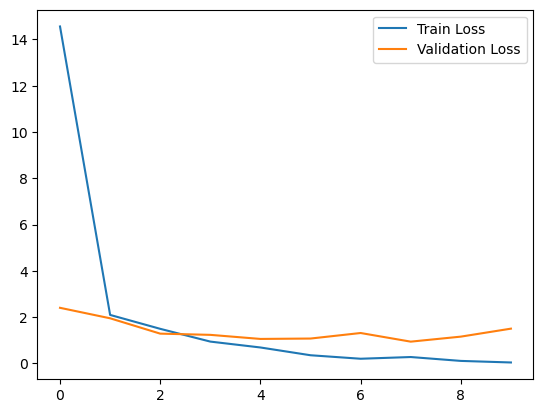

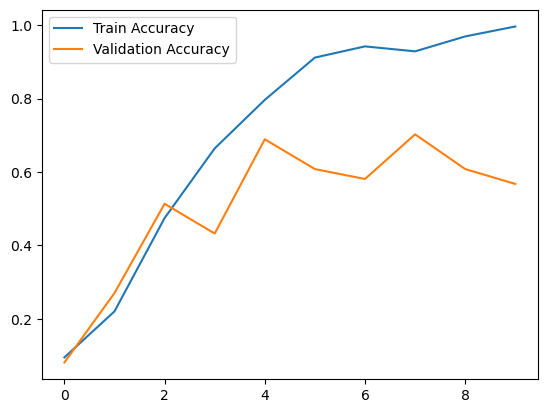

<function __main__.plot_learning_curves(history)>

In [15]:
# Plot the training and validation loss
def plot_learning_curves(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.show()
    return plot_learning_curves


plot_learning_curves(history)